# EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import datetime as datetime
from sklearn.preprocessing import OrdinalEncoder

sns.set()

In [2]:
!ls

asset_details.csv	      close-and-volume.png  train.csv
bitcoin-close-and-volume.png  EDA.ipynb		    train.feather
bitcoin.feather		      ethereum.feather


In [3]:
df = pd.read_feather("bitcoin.feather")

In [2]:
df.head()

NameError: name 'df' is not defined

In [1]:
initial_price = df['Close'][0] * np.linspace(0, len(df), 100000)

# specify plot layouts with different width using subplots()
f, axs = plt.subplots(2,1,
                      figsize=(15,8),
                      sharex=True,
                      gridspec_kw=dict(height_ratios=[2,0.5]))

# make scatterplot with legends
sns.lineplot(data=bitcoin,
                x="datetime", y="Close",
                ax=axs[0],
                ).set(title="Bitcoin Close Price & Volume")
s
sns.lineplot(data=bitcoin,
                x="datetime",
                y="Volume",
                ax=axs[1],
                legend=False)
f.tight_layout()
plt.savefig('bitcoin-close-and-volume.png')

NameError: name 'df' is not defined

In [5]:
bitcoin_returns = bitcoin

In [6]:
bitcoin_returns['Pct Change'] = bitcoin['Close'].pct_change()

In [9]:
bitcoin_returns['Log Returns'] = np.log(bitcoin['Close']) - np.log(bitcoin['Close'].shift(1))

In [11]:
bitcoin_returns['Squared Log Returns'] = bitcoin_returns['Log Returns'] **2

In [12]:
bitcoin_returns

,index,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,datetime,date,time,date_id,time_id,Pct Change,Log Returns,Squared Log Returns
0,2,1514764860,1,229.0,13835.194000,14013.800000,13666.11,13850.176000,31.550062,13827.062093,-0.014643,2018-01-01 00:01:00,2018-01-01,00:01:00,0,1,NaN,NaN,NaN
1,10,1514764920,1,235.0,13835.036000,14052.300000,13680.00,13828.102000,31.046432,13840.362591,-0.015037,2018-01-01 00:02:00,2018-01-01,00:02:00,0,2,-0.001594,-0.001595,2.544158e-06
2,18,1514764980,1,528.0,13823.900000,14000.400000,13601.00,13801.314000,55.061820,13806.068014,-0.010309,2018-01-01 00:03:00,2018-01-01,00:03:00,0,3,-0.001937,-0.001939,3.760083e-06
3,26,1514765040,1,435.0,13802.512000,13999.000000,13576.28,13768.040000,38.780529,13783.598101,-0.008999,2018-01-01 00:04:00,2018-01-01,00:04:00,0,4,-0.002411,-0.002414,5.826628e-06
4,34,1514765100,1,742.0,13766.000000,13955.900000,13554.44,13724.914000,108.501637,13735.586842,-0.008079,2018-01-01 00:05:00,2018-01-01,00:05:00,0,5,-0.003132,-0.003137,9.842292e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956277,24236739,1632182160,1,1940.0,42983.780000,43001.850849,42878.26,42899.012857,56.850913,42935.489499,NaN,2021-09-20 23:56:00,2021-09-20,23:56:00,1358,1436,-0.002005,-0.002007,4.029654e-06
1956278,24236753,1632182220,1,2026.0,42904.197143,42932.000000,42840.16,42860.005714,80.993326,42879.576084,NaN,2021-09-20 23:57:00,2021-09-20,23:57:00,1358,1437,-0.000909,-0.000910,8.275395e-07
1956279,24236767,1632182280,1,1986.0,42859.385714,42887.500000,42797.20,42827.020000,65.677734,42844.090693,NaN,2021-09-20 23:58:00,2021-09-20,23:58:00,1358,1438,-0.000770,-0.000770,5.927638e-07
1956280,24236781,1632182340,1,4047.0,42839.012802,43042.160000,42818.10,43017.277143,138.335477,42935.761938,NaN,2021-09-20 23:59:00,2021-09-20,23:59:00,1358,1439,0.004442,0.004433,1.964810e-05


In [10]:
returns_min_avg = [np.mean(bitcoin[bitcoin['time'] == x]['Pct Change']) for x in bitcoin['time'].unique()]

<AxesSubplot:>

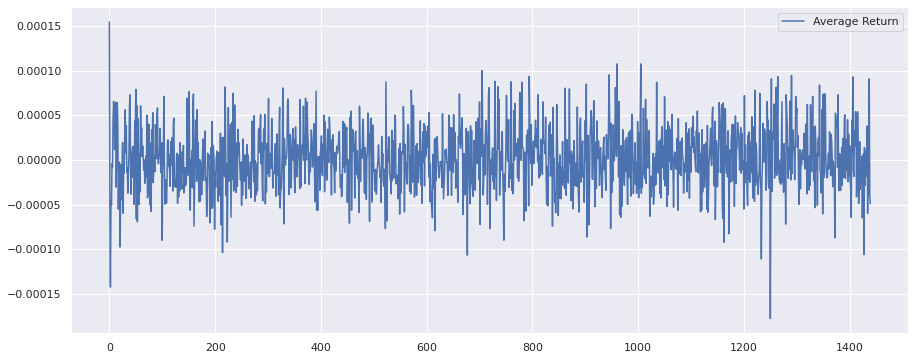

In [11]:
plt.figure(figsize=(15,6))
sns.lineplot(x=bitcoin['time_id'].unique(), y=returns_min_avg, label='Average Return')


In [99]:
bitcoin_minute = pd.DataFrame()
bitcoin_minute['Time'] = bitcoin['time'].unique()
bitcoin_minute['Time_ID'] = bitcoin['time_id'].unique()
bitcoin_minute["Average Return"] = returns_min_avg

In [98]:
bitcoin_minute

,Time,Time_ID,Average Return,Rolling Average Return
0,00:01:00,1,581.615370,NaN
1,00:02:00,2,534.482673,NaN
2,00:03:00,3,529.045389,NaN
3,00:04:00,4,610.908579,NaN
4,00:05:00,5,681.454121,NaN
...,...,...,...,...
1435,23:56:00,1436,617.587174,627.723946
1436,23:57:00,1437,500.107596,606.109179
1437,23:58:00,1438,624.157755,607.869226
1438,23:59:00,1439,548.972061,584.176012


In [11]:
bitcoin['date'] = pd.to_datetime(bitcoin['date'])

In [12]:
bitcoin['date']

0         2018-01-01
1         2018-01-01
2         2018-01-01
3         2018-01-01
4         2018-01-01
             ...    
1956277   2021-09-20
1956278   2021-09-20
1956279   2021-09-20
1956280   2021-09-20
1956281   2021-09-21
Name: date, Length: 1956282, dtype: datetime64[ns]

In [13]:
bitcoin['Day'] = bitcoin['date'].dt.dayofyear

In [14]:
bitcoin['Day']

0            1
1            1
2            1
3            1
4            1
          ... 
1956277    263
1956278    263
1956279    263
1956280    263
1956281    264
Name: Day, Length: 1956282, dtype: int64

In [19]:
bitcoin_daily = pd.DataFrame()
bitcoin_daily['Date'] = bitcoin['date'].unique()


In [20]:
bitcoin_daily

,Date
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
1355,2021-09-17
1356,2021-09-18
1357,2021-09-19
1358,2021-09-20


In [13]:
bitcoin_realized_var = [sum(bitcoin_returns[bitcoin_returns['date_id'] == x]['Squared Log Returns']) for x in bitcoin_returns['date_id'].unique()]

In [15]:
len(bitcoin_realized_var)

1360

<AxesSubplot:xlabel='Date'>

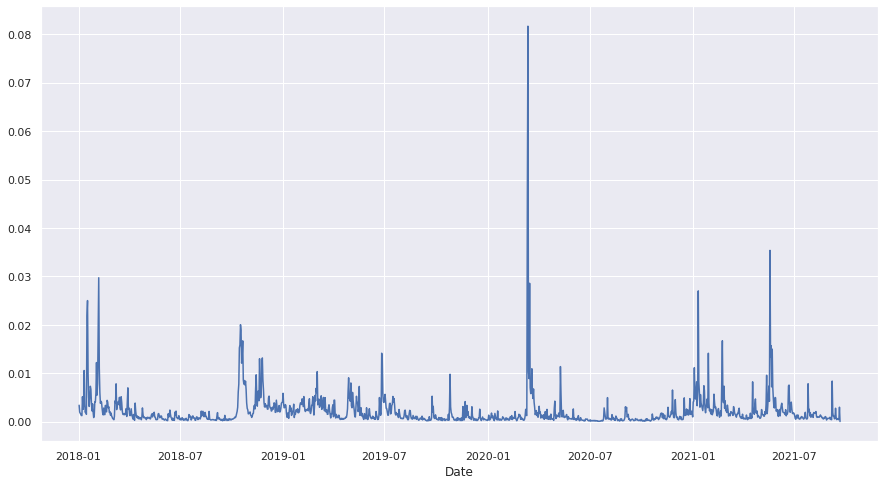

In [23]:
plt.figure(figsize=(15,8))
sns.lineplot(x=bitcoin_daily['Date'], y=bitcoin_realized_var)

(0.0, 0.1)

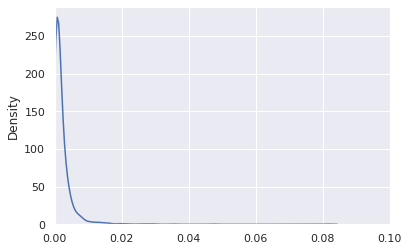

In [27]:
sns.kdeplot(bitcoin_realized_var)
plt.xlim(0,0.1)

## 